<a href="https://colab.research.google.com/github/schardot/cursoML_Hype/blob/main/Aula2_KNN_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importando Bibliotecas importantes

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler

# Carregar e explorar o dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
file_path = '/content/drive/MyDrive/Datasets/cat_breeds_clean.csv'
data = pd.read_csv('/content/drive/MyDrive/Datasets/cat_breeds_clean.csv', sep=';')
data.head()

In [ ]:
print("Features:", data.columns)
print("")
print("Classes:", data.Breed.unique())
print("")
print("Dimensões do Dataset:", data.shape)

Features: Index(['Breed', 'Age_in_years', 'Age_in_months', 'Gender',
       'Neutered_or_spayed', 'Body_length', 'Weight', 'Fur_colour_dominant',
       'Fur_pattern', 'Eye_colour', 'Allowed_outdoor', 'Preferred_food',
       'Owner_play_time_minutes', 'Sleep_time_hours', 'Country', 'Latitude',
       'Longitude'],
      dtype='object')

Classes: ['Angora' 'Maine coon' 'Ragdoll']

Dimensões do Dataset: (1071, 17)


# Definindo as características para análise

In [ ]:
X = data[['Age_in_years', 'Weight']]
y = data['Breed']

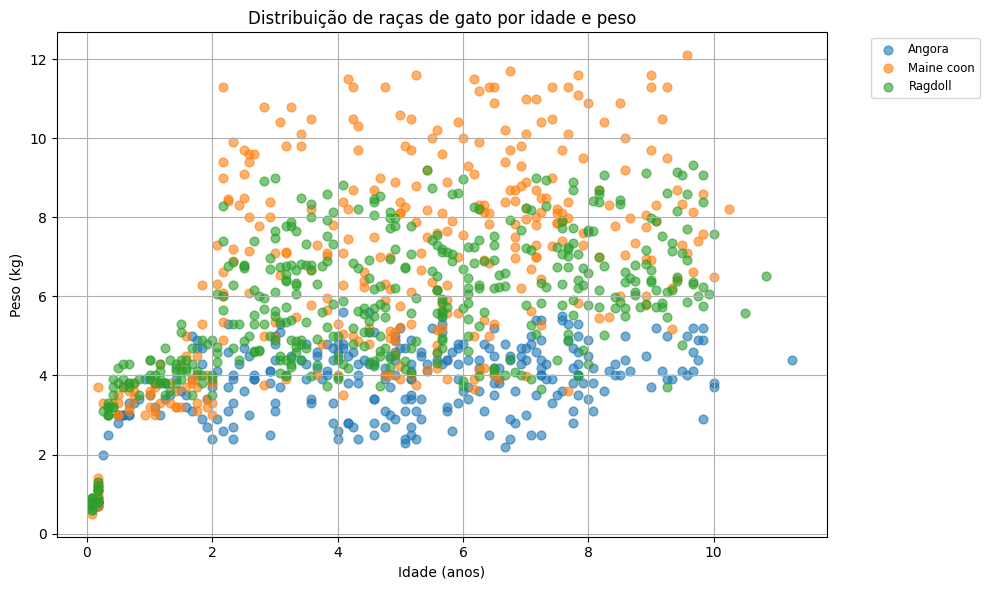

In [ ]:
plt.figure(figsize=(10, 6))
for breed in data['Breed'].unique():
    subset = data[data['Breed'] == breed]
    plt.scatter(subset['Age_in_years'], subset['Weight'], label=breed, alpha=0.6, s=40)

plt.title('Distribuição de raças de gato por idade e peso')
plt.xlabel('Idade (anos)')
plt.ylabel('Peso (kg)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small')
plt.grid(True)
plt.tight_layout()
plt.show()

# Criando o modelo com k = 5

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)

In [ ]:
# Normalizar as features
scaler = StandardScaler()
X_normalizado = scaler.fit_transform(X)

# Executa validação cruzada com 5 folds
scores = cross_val_score(knn, X_normalizado, y, cv=5)

# Mostra os resultados
print("Accuracy por fold:", scores)
print("Accuracy média: {:.4f}".format(scores.mean()))

Accuracy por fold: [0.44186047 0.48598131 0.42056075 0.67757009 0.57943925]
Accuracy média: 0.5211


# Testando com os valores de 1 a 20 para k

Melhor k: 20 com acurácia média de 0.5361


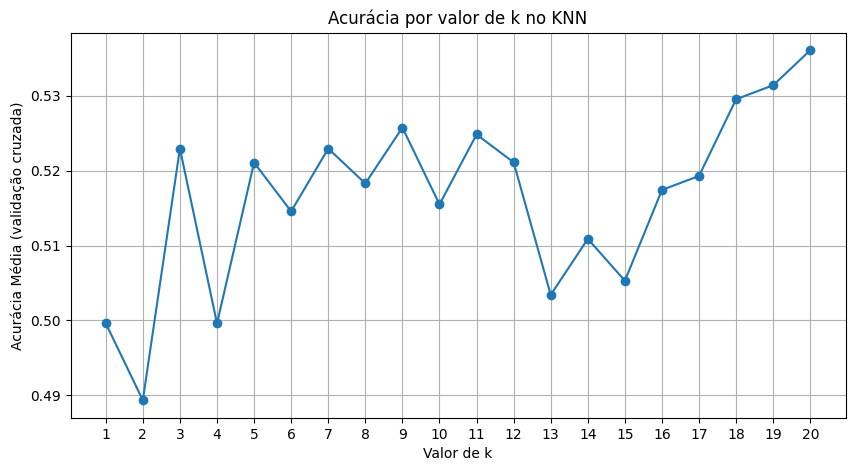

In [ ]:
# Testar vários valores de k
k_values = list(range(1, 21))  # testando k de 1 até 20
mean_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_normalizado, y, cv=5)
    mean_scores.append(scores.mean())

# Mostrar o melhor k
melhor_k = k_values[mean_scores.index(max(mean_scores))]
print(f"Melhor k: {melhor_k} com acurácia média de {max(mean_scores):.4f}")

# Plotar resultados
plt.figure(figsize=(10, 5))
plt.plot(k_values, mean_scores, marker='o')
plt.xlabel('Valor de k')
plt.ylabel('Acurácia Média (validação cruzada)')
plt.title('Acurácia por valor de k no KNN')
plt.xticks(k_values)
plt.grid(True)
plt.show()

# Testando com os valores de 1 a 500 para k

Melhor k: 157 com acurácia média de 0.6079


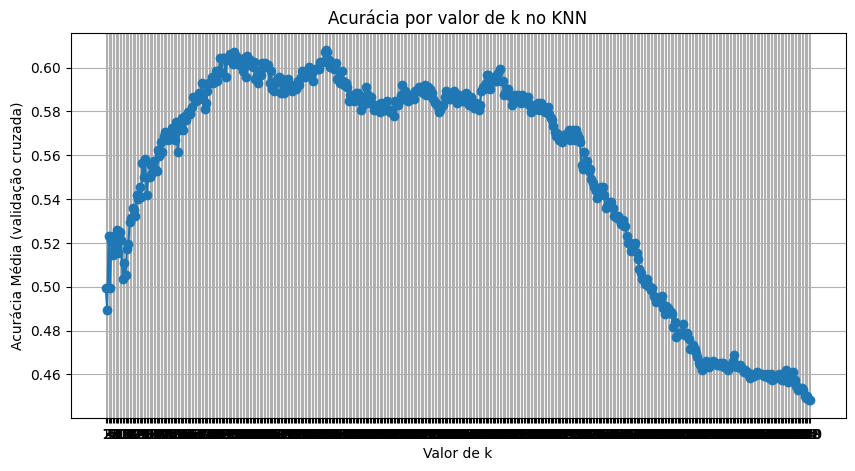

In [ ]:
# Testar vários valores de k
k_values = list(range(1, 501))  # testando k de 1 até 30
mean_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_normalizado, y, cv=5)
    mean_scores.append(scores.mean())

# Mostrar o melhor k
melhor_k = k_values[mean_scores.index(max(mean_scores))]
print(f"Melhor k: {melhor_k} com acurácia média de {max(mean_scores):.4f}")

# Plotar resultados
plt.figure(figsize=(10, 5))
plt.plot(k_values, mean_scores, marker='o')
plt.xlabel('Valor de k')
plt.ylabel('Acurácia Média (validação cruzada)')
plt.title('Acurácia por valor de k no KNN')
plt.xticks(k_values)
plt.grid(True)
plt.show()